In [60]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('edg.csv')
df.head()

,levels,themes,formats,teams_l,teams_r,scores_l,scores_r,times
0,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,BLG,V,S,2025/05/02 19:00
1,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,DRG,2,1,2025/04/20 19:10
2,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,XLG,0,2,2025/04/19 19:15
3,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,FPX,2,0,2025/04/13 19:10
4,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,TEC,2,1,2025/04/05 19:30


In [63]:
tmp = df[(df['levels'] == 'S级') & (df['scores_l'] != 'V')] # 筛选出已经结束的S级赛事
# 创建新列iswin,为一的条件是在bo3中拿到两分 或 在bo5中拿到三分
tmp = tmp.assign(iswin=lambda x: (((x['scores_l'] == '2') & (tmp['formats'] == '(BO3)')) | (x['scores_l'] == '3')).astype(int))
tmp

,levels,themes,formats,teams_l,teams_r,scores_l,scores_r,times,iswin
1,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,DRG,2,1,2025/04/20 19:10,1
2,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,XLG,0,2,2025/04/19 19:15,0
3,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,FPX,2,0,2025/04/13 19:10,1
4,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,TEC,2,1,2025/04/05 19:30,1
5,S级,VCT 2025: CN联赛 第一赛段,(BO3),EDG,DRG,2,1,2025/03/29 20:15,1
...,...,...,...,...,...,...,...,...,...
98,S级,VCT 2023: 东京大师赛,(BO3),EDG,NAVI,2,0,2023/06/13 17:00,1
99,S级,VCT 2023: 东京大师赛,(BO3),EDG,T1,1,2,2023/06/11 17:00,0
115,S级,VCT 2023: 圣保罗季前邀请赛,(BO3),EDG,100T,1,2,2023/02/24 07:00,0
116,S级,VCT 2022: 全球冠军赛,(BO3),EDG,TL,0,2,2022/09/04 23:50,0


In [64]:
tmp1 = tmp.groupby('teams_r')['iswin'].mean().reset_index()
tmp1.columns = ['teams_r', 'winrate']

In [65]:
# 不知道为什么，和上面的单元格合在一起就有概率报错
tmp1 = tmp1.sort_values('winrate')
tmp1['winrate'] = tmp1['winrate'] * 100
tmp1

,teams_r,winrate
0,100T,0.000000
8,GEN,0.000000
4,EG,0.000000
21,TL,33.333333
15,PRX,33.333333
7,G2,33.333333
12,LOUD,33.333333
24,XLG,50.000000
20,TH,50.000000
17,T1,50.000000


C:\Users\19070\AppData\Local\Temp\ipykernel_14656\3457395124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


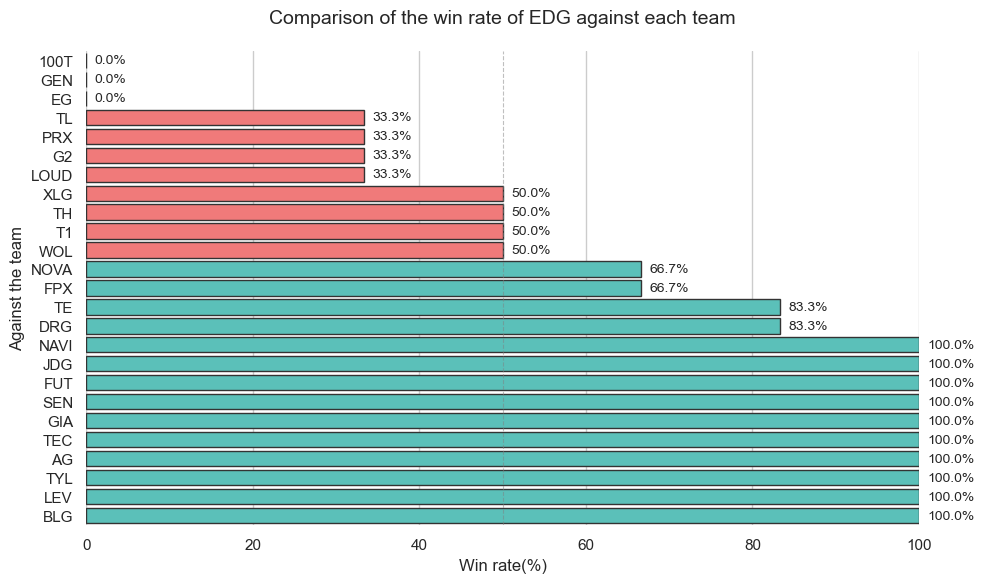

In [66]:
# 设置风格
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 创建条形图
ax = sns.barplot(
    data=tmp1,
    y="teams_r",
    x="winrate",
    palette=["#FF6B6B" if x <= 50 else "#4ECDC4" for x in tmp1["winrate"]],  # 条件配色
    saturation=0.8,
    edgecolor=".2",
    linewidth=1
)

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 1,  # 标签位置（X轴偏移）
        p.get_y() + p.get_height() / 2,  # 居中显示
        f"{width:.1f}%",
        ha="left",
        va="center",
        fontsize=10
    )

# 优化标题和坐标轴
plt.title("Comparison of the win rate of EDG against each team", fontsize=14, pad=20)
plt.xlabel("Win rate(%)", fontsize=12)
plt.ylabel("Against the team", fontsize=12)
plt.xlim(0, 100)
plt.axvline(50, color="gray", linestyle="--", linewidth=0.8, alpha=0.5)  # 参考线

# 移除多余的边框
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [82]:
tmp2 = tmp.groupby('teams_r')['iswin'].agg(['count', 'sum']).reset_index()
tmp2.columns = ['teams_r', 'total', 'win']
tmp2['fail'] = tmp2['total'] - tmp2['win']
tmp2 = tmp2.sort_values('total', ascending=False)
tmp2

,teams_r,total,win,fail
3,DRG,6,5,1
5,FPX,6,4,2
18,TE,6,5,1
15,PRX,6,2,4
2,BLG,4,4,0
17,T1,4,2,2
12,LOUD,3,1,2
14,NOVA,3,2,1
7,G2,3,1,2
21,TL,3,1,2


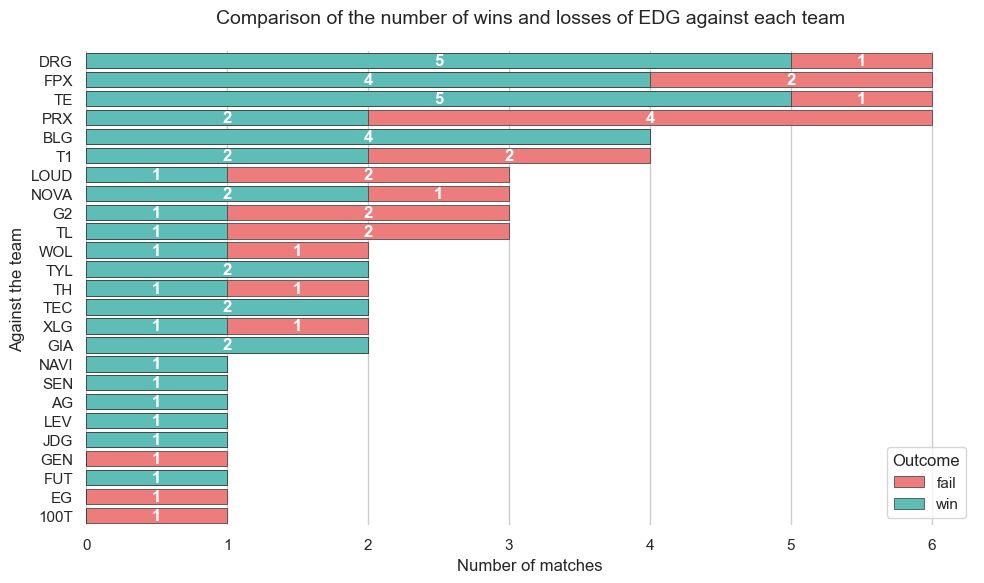

In [ ]:
# 设置风格
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 绘制堆叠条形图
ax = sns.barplot(
    data=tmp2,
    y="teams_r",
    x="total",
    color="#FF6B6B",  # 底层颜色（败场）
    label="fail",
    edgecolor=".2",
    linewidth=0.5
)

sns.barplot(
    data=tmp2,
    y="teams_r",
    x="win",
    color="#4ECDC4",  # 上层颜色（胜场）
    label="win",
    edgecolor=".2",
    linewidth=0.5
)

# 添加数据标签
for i, (win, total) in enumerate(zip(tmp2["win"], tmp2["total"])):
    if win > 0:
        ax.text(
            win / 2,          # 胜场标签位置（居中）
            i,               # Y轴位置
            f"{win}",
            ha="center",
            va="center",
            color="white",
            fontweight="bold"
        )
    if total - win > 0:
        ax.text(
            win + (total - win) / 2,  # 败场标签位置（居中）
            i,
            f"{total-win}",
            ha="center",
            va="center",
            color="white",
            fontweight="bold"
        )

# 优化标题和图例
plt.title("Comparison of the number of wins and losses of EDG against each team", fontsize=14, pad=20)
plt.xlabel("Number of matches", fontsize=12)
plt.ylabel("Against the team", fontsize=12)
plt.legend(title="Outcome", loc="lower right")
sns.despine(left=True, bottom=True)

plt.tight_layout()

output_path = "EDG_vs_opponents.png"  # 文件路径
plt.savefig( # 保存到本地
    output_path,
    dpi=300,                  # 提高分辨率
    bbox_inches="tight",      # 避免边缘被裁剪
    transparent=False         # 背景透明（可选）
)

plt.show()